# ***Libraries***

In [82]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [83]:
#check for CUDA availibility
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


# ***Data Collection and Preprocessing***

In [84]:
#Load the breast cancer dataset

data = load_breast_cancer()
x = data.data
y = data.target

In [85]:
print(x)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [86]:
print(y[:5])

[0 0 0 0 0]


*Split the dataset into training and test set*

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [88]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(569, 30)
(455, 30)
(114, 30)


*Standardize the data using standerd sclaer*

In [89]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#normally distributed data done

In [90]:
type(x_train)

numpy.ndarray

In [91]:
#convert data to Pytorch tensors and move it to GPU
x_train = torch.tensor(x_train, dtype=torch.float32).to(device)
x_test = torch.tensor(x_test, dtype=torch.float32).to(device)

y_train = torch.tensor(y_train, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.float32).to(device)

# ***Build the Neural Network***

In [92]:
# importing tensorflow and Keras
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [93]:
# setting up the layers of Neural Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(30,)),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])

In [94]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# ***Neural Network Architecture***

In [95]:
#define the architecture

class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(NeuralNet, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, output_size)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    out = self.fc1(x)
    out = self.relu(out) #activation fn
    out = self.fc2(out)
    out = self.sigmoid(out)
    return out

In [96]:
# Define hyperparameters
input_size = x_train.shape[1]
hidden_size = 64
output_size = 1
learning_rate = 0.001
num_epochs = 100

In [97]:
# Initialize the neural network and move it the GPU
model = NeuralNet(input_size, hidden_size, output_size).to(device)

In [98]:
#define loss and the optimizer

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# ***Training the NN***

In [99]:
# training the model
for epoch in range(num_epochs):
  model.train()
  optimizer.zero_grad()
  outputs = model(x_train)
  loss = criterion(outputs, y_train.view(-1,1))
  loss.backward()
  optimizer.step()

  # claculate accuracy
  with torch.no_grad():
    predicted = outputs.round()
    correct = (predicted == y_train.view(-1,1)).float().sum()
    accuracy = correct/y_train.size(0)

  if (epoch+1) % 10 == 0:
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss : {loss.item():.4f}, Accuracy: {accuracy.item() * 100:.2f}%")

Epoch [10/100], Loss : 0.5228, Accuracy: 88.79%
Epoch [20/100], Loss : 0.4124, Accuracy: 91.87%
Epoch [30/100], Loss : 0.3268, Accuracy: 93.19%
Epoch [40/100], Loss : 0.2616, Accuracy: 94.07%
Epoch [50/100], Loss : 0.2144, Accuracy: 94.51%
Epoch [60/100], Loss : 0.1810, Accuracy: 94.29%
Epoch [70/100], Loss : 0.1568, Accuracy: 95.82%
Epoch [80/100], Loss : 0.1388, Accuracy: 96.48%
Epoch [90/100], Loss : 0.1246, Accuracy: 97.14%
Epoch [100/100], Loss : 0.1134, Accuracy: 97.14%


Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2742 - accuracy: 0.9210 - val_loss: 0.1601 - val_accuracy: 0.9526
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1232 - accuracy: 0.9628 - val_loss: 0.1085 - val_accuracy: 0.9671
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0899 - accuracy: 0.9725 - val_loss: 0.1004 - val_accuracy: 0.9705
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0730 - accuracy: 0.9770 - val_loss: 0.1043 - val_accuracy: 0.9669
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0580 - accuracy: 0.9811 - val_loss: 0.0846 - val_accuracy: 0.9742
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0500 - accuracy: 0.9843 - val_loss: 0.0890 - val_accuracy: 0.9737
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0428 - accuracy: 0.9858 - val_loss: 0.0892 - val_accuracy:

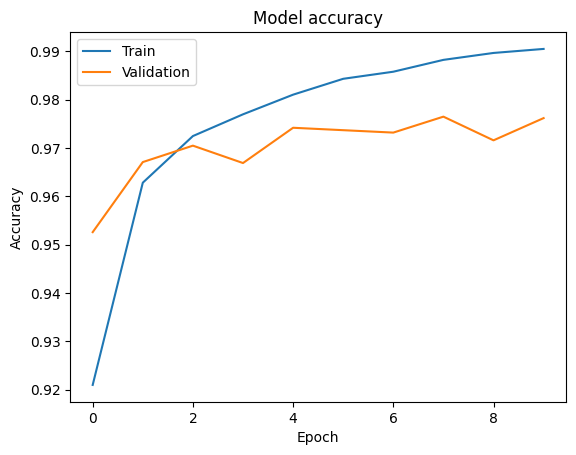

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to categorical one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Define input shape and number of classes
input_shape = x_train.shape[1:]  # For MNIST, this will be (28, 28)
num_classes = 10

# Create a simple neural network model
model = Sequential([
    Flatten(input_shape=input_shape),  # Flatten the input for fully connected layers
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Extract the accuracy from the training history
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']

# Plot training & validation accuracy values
plt.plot(train_accuracy, label='Train')
plt.plot(test_accuracy, label='Validation')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

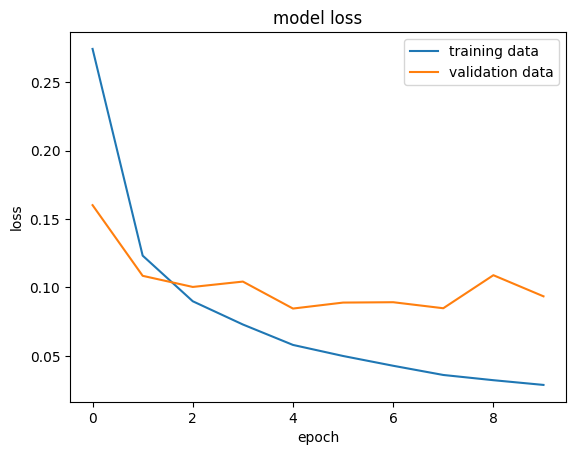

In [101]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

# ***Model Evaluation***

In [102]:
# Evaluate the model on the training data
train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=2)

# Evaluate the model on the validation data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

print(f'Training Accuracy: {train_accuracy}')
print(f'Validation Accuracy: {test_accuracy}')


1875/1875 - 3s - loss: 0.0214 - accuracy: 0.9933 - 3s/epoch - 1ms/step
313/313 - 1s - loss: 0.0935 - accuracy: 0.9762 - 692ms/epoch - 2ms/step
Training Accuracy: 0.993316650390625
Validation Accuracy: 0.9761999845504761


In [103]:
#Evaluation on Training

train_predictions = model.predict(x_train)   # Predict probabilities for training data

train_predicted_classes = (train_predictions > 0.5).astype(int)  # Convert probabilities to class predictions (0 or 1)

# Calculate accuracy
correct_train_predictions = (train_predicted_classes == y_train).sum()
total_train_samples = y_train.shape[0]
train_accuracy = correct_train_predictions / total_train_samples

print(f"Training Accuracy: {accuracy.item() * 100:.2f}%")

1875/1875 [==============================] - 3s 2ms/step
Training Accuracy: 97.14%


In [115]:
#Evaluation on Testing

test_predictions = model.predict(x_test)   # Predict probabilities for training data

test_predicted_classes = (test_predictions > 0.5).astype(int)  # Convert probabilities to class predictions (0 or 1)

# Calculate accuracy
correct_test_predictions = (test_predicted_classes == y_test).sum()
total_test_samples = y_test.shape[0]
test_accuracy = correct_test_predictions / total_test_samples

print(f"Testing Accuracy: {accuracy.item() * 100:.2f}%")

313/313 [==============================] - 0s 1ms/step
Testing Accuracy: 97.14%


In [105]:
y_pred = model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [106]:
print(y_pred.shape)
print(y_pred[0])

(10000, 10)
[1.3795208e-08 2.9894236e-11 1.8169752e-07 6.0203194e-04 9.3410391e-16
 1.4292685e-09 4.3843264e-15 9.9937946e-01 4.9721013e-08 1.8243147e-05]


In [107]:
print(x_test)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [108]:
print(y_pred)

[[1.3795208e-08 2.9894236e-11 1.8169752e-07 ... 9.9937946e-01
  4.9721013e-08 1.8243147e-05]
 [1.6406171e-09 6.4738837e-05 9.9899906e-01 ... 7.8537676e-07
  5.4000214e-08 3.2581435e-12]
 [3.4099363e-09 9.9995071e-01 7.7662401e-07 ... 3.7092006e-05
  1.0563356e-06 9.3828184e-08]
 ...
 [5.8597255e-18 9.7218898e-14 4.8716256e-14 ... 1.5510372e-09
  3.8930361e-12 6.5779794e-08]
 [5.0010607e-14 4.4311871e-13 1.0151541e-13 ... 2.1282246e-13
  9.9069153e-09 4.2636377e-15]
 [1.2253845e-15 4.4096187e-21 3.3500479e-19 ... 9.1482695e-17
  2.2307278e-19 3.8055403e-19]]


In [109]:
# argmax function

my_list = [0.25, 0.56]

index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)

[0.25, 0.56]
1


In [110]:
# converting the prediction probability to class labels

y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 0, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 9, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 